In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)
plt.style.use('ggplot')
pd.__version__

'0.24.2'

## Data
The data is a set of ten salaries, as used in the Udacity course 'Intro to Descriptive Statistics' lesson 4 on measures of variability.

In [43]:
data = pd.DataFrame({'salaries': 
                     [33219, 36254, 38801, 46335, 46840, 
                      47596, 55130, 56863, 78070, 88830]})
data

   salaries
0     33219
1     36254
2     38801
3     46335
4     46840
5     47596
6     55130
7     56863
8     78070
9     88830

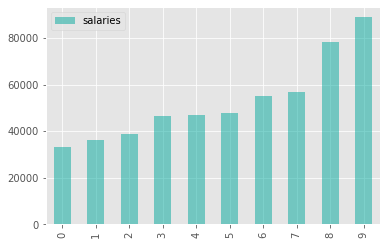

In [44]:
data.plot(kind='bar', color='#00A99D', alpha=.5)

In [10]:
p=[1,2,3,4,5,6,7,8,9,10]

In [12]:
mean=5.5


In [11]:
import numpy as np

In [14]:
ll=0
for i in range(len(p)):
    ll+=np.square((p[i]-mean))
print("variance :",ll/len(p))
    

variance : 8.25


## Calculate the Variance
The variance of a data set describes the average of the squared differences from the mean. In other words, it is a measure of how far each value in the data set is from the mean. The symbol for the variance of a population is $\sigma^2$ (sigma squared) and for a sample we use $s^2$. We calculate the variance by summing the squared difference from the mean for each value. For the population, we divide by the number of values $n$ in the data set.

$$population\ variance:\ \sigma^2=\frac{1}{n}\sum_{i=0}^n(x_i-\mu)^2$$

For the sample we divide the summed up values by the degrees of freedom $n-1$ (also called Bessel's correction). We use $\bar{x}$ (x bar) to symbolize our sample mean.

$$sample\ variance:\ s^2=\frac{1}{n-1}\sum_{i=0}^n(x_i-\bar{x})^2$$

In [16]:
data.salaries

0    33219
1    36254
2    38801
3    46335
4    46840
5    47596
6    55130
7    56863
8    78070
9    88830
Name: salaries, dtype: int64

In [45]:
# To calculate the population variance
n = len(data.salaries)

# first calculate the mean
mean = data.salaries.mean()

# Sum up the squared differences from the mean
squared_deviations = 0
for v in data.salaries:
    squared_deviations += (v - mean) ** 2

population_variance = squared_deviations / n
population_variance

291622740.36

In [46]:
# To calculate the variance if we only have a sample
# First calculate the degrees of freedom (apply Bessel's correction)
dof = n - 1
sample_variance = squared_deviations / dof
sample_variance

324025267.0666667

In [23]:
data.salaries.var(ddof=0)

291622740.36

In [24]:
data.salaries

0    33219
1    36254
2    38801
3    46335
4    46840
5    47596
6    55130
7    56863
8    78070
9    88830
Name: salaries, dtype: int64

In [6]:
# Of course we can use pandas to let NumPy do the job for us
# The ddof parameter stands for Delta Degrees of Freedom
population_variance = data.salaries.var(ddof=0)
sample_variance = data.salaries.var() # ddof=1 by default in pandas

population_variance, sample_variance

(291622740.35999984, 324025267.06666648)

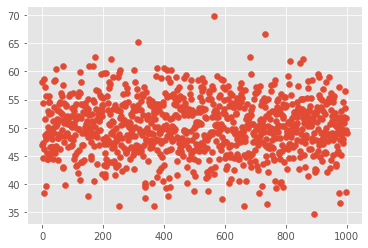

In [32]:
plt.scatter(range(len(data)),data)

In [31]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(1000) + 50
# calculate summary statistics
data_mean, data_std = mean(data), std(data)


Identified outliers: 4
Non-outlier observations: 996


In [34]:
data_mean,data_std

(50.194062380798016, 4.9050206696610585)

In [37]:
upper

64.9091243897812

In [38]:
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 4
Non-outlier observations: 996


In [39]:
outliers

[65.15428556186015, 69.79301352018982, 66.60539378085183, 34.73117809786848]

In [7]:
# Or call the NumPy var function ourselves
population_variance = np.var(data.salaries) # ddof=0 by default in NumPy
sample_variance = np.var(data.salaries, ddof=1)

population_variance, sample_variance

(291622740.35999984, 324025267.06666648)

## Calculate the Standard Deviation
The standard deviation is a widely used normalized measure of spread of a data set. Unlike the variance, the standard deviation is using the same scale as our values; dollars in this case. In a normal distribution, about 95% of the values are within two standard deviations of the mean. We use the Greek letter sigma $\sigma$ to symbolize the population standard deviation. 

$$population\ standard\ deviation:\ \sigma=\sqrt{\frac{1}{n}\sum_{i=0}^n(x_i-\mu)^2}\ \ =\ \ \sqrt{\sigma^2}$$

We use the lowercase letter $s$ if we indicate the sample standard deviation.

$$sample\ standard\ deviation:\ s=\sqrt{\frac{1}{n-1}\sum_{i=0}^n(x_i-\bar{x})^2}\ \ =\ \ \sqrt{s^2}$$

In [47]:
# To calculate the population standard deviation
# we first need to calculate the population variance again
n = len(data.salaries)

# first calculate the mean
mean = data.salaries.mean()

# Sum up the squared differences from the mean
squared_deviations = 0
for v in data.salaries:
    squared_deviations += (v - mean) ** 2

population_variance = squared_deviations / n

# Square the variance
population_standard_deviation = math.sqrt(population_variance)
population_standard_deviation

17076.965197598784

In [48]:
# To calculate the sample standard deviation
# First calculate the degrees of freedom (apply Bessel's correction)
dof = n - 1
sample_variance = squared_deviations / dof

# Square the variance
sample_standard_deviation = math.sqrt(sample_variance)
sample_standard_deviation

18000.70184927984

In [10]:
# Now let's use pandas to let NumPy do the job for us
population_standard_deviation = data.salaries.std(ddof=0)
sample_standard_deviation = data.salaries.std()

population_standard_deviation, sample_standard_deviation

(17076.965197598776, 18000.701849279834)

In [52]:
# Or call the NumPy std function ourselves
population_standard_deviation = np.std(data.salaries)
sample_standard_deviation = np.std(data.salaries, ddof=1)

population_standard_deviation, sample_standard_deviation

(17076.965197598784, 18000.70184927984)